In [36]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
from google.colab import drive
drive.mount('/content/mnt')

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


In [3]:
data_folder = '/content/mnt/MyDrive/데이터/cctv'

In [4]:
cctv = pd.read_csv(f'{data_folder}/cctv.csv', encoding='EUC-KR', header=1)
cctv.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,"77,032","7,667","2,200","3,491","4,439","6,582","8,129","9,947","9,876","11,961","11,132","1,608"
1,종로구,"1,772",813,0,0,210,150,1,261,85,9,200,43
2,중 구,"2,333",16,114,87,77,236,240,372,386,155,361,289
3,용산구,"2,383",34,71,234,125,221,298,351,125,307,617,0
4,성동구,"3,602",448,125,212,105,339,310,874,390,262,461,76


In [5]:
for column in cctv.columns[1:]:
    cctv[column] = cctv[column].apply(lambda x: int(x.replace(',','')))
cctv.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,77032,7667,2200,3491,4439,6582,8129,9947,9876,11961,11132,1608
1,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
2,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
3,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
4,성동구,3602,448,125,212,105,339,310,874,390,262,461,76


In [6]:
cctv.rename(columns={'구분': '구별'}, inplace=True)
cctv['2017년_이전'] = cctv.총계 - cctv['2018년'] - cctv['2019년'] - cctv['2020년'] - cctv['2021년']
cctv['최근증가율'] = ((cctv['2018년']+cctv['2019년']+cctv['2020년']) / cctv['2017년_이전'] * 100).round(2)
cctv = cctv[['구별','총계','최근증가율']]
cctv.head()

,구별,총계,최근증가율
0,계,77032,77.66
1,종로구,1772,20.49
2,중 구,2333,78.98
3,용산구,2383,78.64
4,성동구,3602,46.13


In [7]:
# 첫번째 행 제거
cctv.drop([0], inplace=True)
cctv.head()

,구별,총계,최근증가율
1,종로구,1772,20.49
2,중 구,2333,78.98
3,용산구,2383,78.64
4,성동구,3602,46.13
5,광진구,2588,112.29


In [8]:
cctv.columns = ['구별','CCTV댓수','최근증가율']
cctv.head()

,구별,CCTV댓수,최근증가율
1,종로구,1772,20.49
2,중 구,2333,78.98
3,용산구,2383,78.64
4,성동구,3602,46.13
5,광진구,2588,112.29


In [9]:
# 최근증가율 Top 5
cctv.sort_values(by='최근증가율', ascending=False).head()

,구별,CCTV댓수,최근증가율
9,강북구,2462,446.95
24,송파구,2854,203.19
7,중랑구,3296,191.07
18,금천구,2374,149.47
12,은평구,3791,117.86


In [10]:
human = pd.read_csv(f'{data_folder}/서울인구통계.txt', sep='\t', header=2)
human.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2021.2/4,합계,"4,405,638","9,795,426","4,756,178","5,039,248","9,565,990","4,649,442","4,916,548","229,436","106,736","122,700",2.17,"1,576,971"
1,2021.2/4,종로구,"73,525","155,106","75,009","80,097","146,029","70,985","75,044","9,077","4,024","5,053",1.99,"27,605"
2,2021.2/4,중구,"62,897","132,259","64,526","67,733","123,016","60,019","62,997","9,243","4,507","4,736",1.96,"23,980"
3,2021.2/4,용산구,"111,650","240,665","116,858","123,807","226,378","108,948","117,430","14,287","7,910","6,377",2.03,"38,884"
4,2021.2/4,성동구,"134,542","295,767","143,927","151,840","289,162","141,042","148,120","6,605","2,885","3,720",2.15,"45,591"


In [11]:
pop = human[['자치구','계','계.1','계.2','65세이상고령자']]
pop.columns = ['구별','인구수','내국인','외국인','고령자']
pop.head()

,구별,인구수,내국인,외국인,고령자
0,합계,"9,795,426","9,565,990","229,436","1,576,971"
1,종로구,"155,106","146,029","9,077","27,605"
2,중구,"132,259","123,016","9,243","23,980"
3,용산구,"240,665","226,378","14,287","38,884"
4,성동구,"295,767","289,162","6,605","45,591"


In [12]:
for column in pop.columns[1:]:
    pop[column] = pop[column].apply(lambda x: int(x.replace(',','')))
pop.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,구별,인구수,내국인,외국인,고령자
0,합계,9795426,9565990,229436,1576971
1,종로구,155106,146029,9077,27605
2,중구,132259,123016,9243,23980
3,용산구,240665,226378,14287,38884
4,성동구,295767,289162,6605,45591


In [13]:
pop.drop([0], inplace=True)
pop['외국인비율'] = (pop.외국인/pop.인구수*100).round(2)
pop['고령자비율'] = np.round(pop.고령자/pop.인구수*100, 2)
pop.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
1,종로구,155106,146029,9077,27605,5.85,17.80
2,중구,132259,123016,9243,23980,6.99,18.13
3,용산구,240665,226378,14287,38884,5.94,16.16
4,성동구,295767,289162,6605,45591,2.23,15.41
5,광진구,355306,342481,12825,50815,3.61,14.30


In [14]:
df = pd.merge(cctv, pop)
df.set_index('구별', inplace=True)
df.head()

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1772,20.49,155106,146029,9077,27605,5.85,17.80
용산구,2383,78.64,240665,226378,14287,38884,5.94,16.16
성동구,3602,46.13,295767,289162,6605,45591,2.23,15.41
광진구,2588,112.29,355306,342481,12825,50815,3.61,14.30
동대문구,2497,34.85,352259,338040,14219,61262,4.04,17.39


In [15]:
df.shape

(24, 8)

- 상관관계

In [16]:
# 고령자 비율과 CCTV 댓수
np.corrcoef(df.고령자비율, df.CCTV댓수)

array([[ 1.        , -0.37593919],
       [-0.37593919,  1.        ]])

In [17]:
# 외국인 비율과 CCTV 댓수
np.corrcoef(df.외국인비율, df.CCTV댓수)

array([[ 1.        , -0.12800154],
       [-0.12800154,  1.        ]])

In [18]:
# 인구수와 CCTV 댓수
np.corrcoef(df.인구수, df.CCTV댓수)

array([[1.        , 0.44006971],
       [0.44006971, 1.        ]])

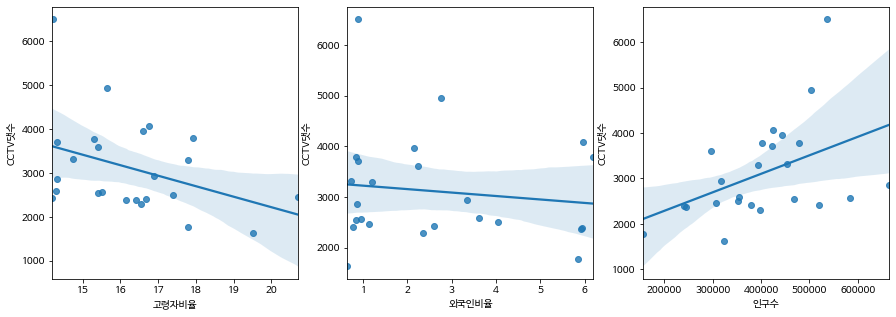

In [19]:
fig, axs = plt.subplots(figsize=(15,5), ncols=3, nrows=1)
features = ['고령자비율','외국인비율','인구수']
for i, feature in enumerate(features):
    row, col = i//4, i%4
    sns.regplot(x=feature, y='CCTV댓수', data=df, ax=axs[col])

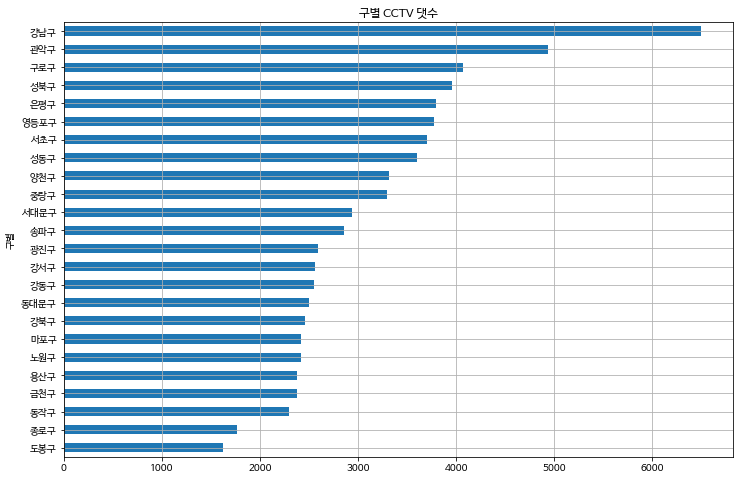

In [20]:
df.CCTV댓수.sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='구별 CCTV 댓수')
plt.show()

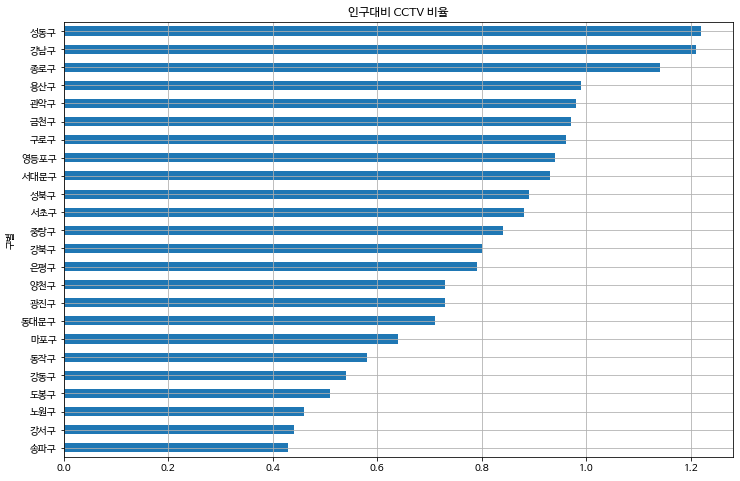

In [21]:
# 인구대비 CCTV 비율
df['cctv비율'] = (df.CCTV댓수 / df.인구수 * 100).round(2)
df.cctv비율.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('인구대비 CCTV 비율')
plt.show()

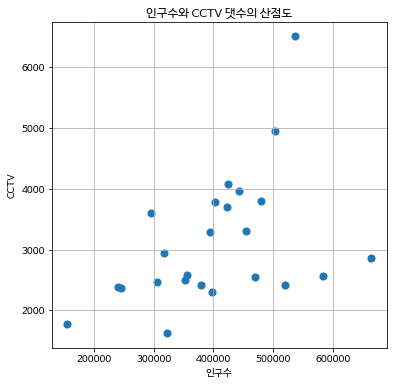

In [22]:

# 인구수와 CCTV 댓수의 산점도
plt.figure(figsize=(6,6))
plt.scatter(df.인구수, df.CCTV댓수, s=50)
plt.grid(True)
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

In [23]:
# 산점도 위에 상관관계를 나타내는 선 그리기
fp1 = np.polyfit(df.인구수, df.CCTV댓수, 1)
fp1

array([4.07016119e-03, 1.47368136e+03])

In [24]:
fx = np.array([100000, 700000])
f1 = np.poly1d(fp1)
fy = f1(fx)
fy

array([1880.69748193, 4322.79419542])

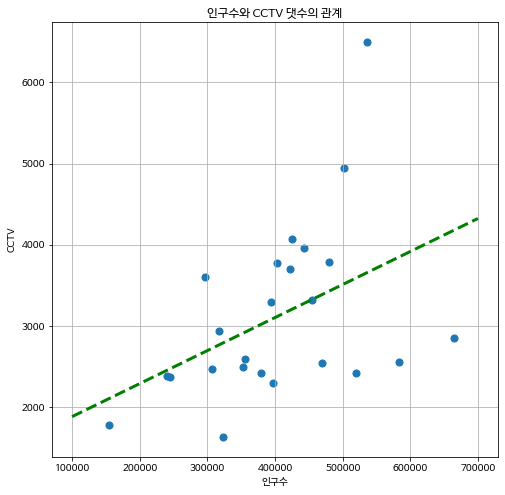

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(df.인구수, df.CCTV댓수, s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')
plt.grid(True)
plt.title('인구수와 CCTV 댓수의 관계')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

In [26]:
df['오차'] = np.abs(df.CCTV댓수 - f1(df.인구수)).round(2)
df_sort = df.sort_values('오차', ascending=False)
df_sort.head()

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,6502,61.64,536107,531375,4732,76184,0.88,14.21,1.21,2846.28
관악구,4942,49.91,502698,488800,13898,78647,2.76,15.64,0.98,1422.26
송파구,2854,203.19,664341,658670,5671,95164,0.85,14.32,0.43,1323.66
강서구,2560,78.53,582995,577519,5476,90404,0.94,15.51,0.44,1286.56
노원구,2415,66.38,520005,515997,4008,86697,0.77,16.67,0.46,1175.19


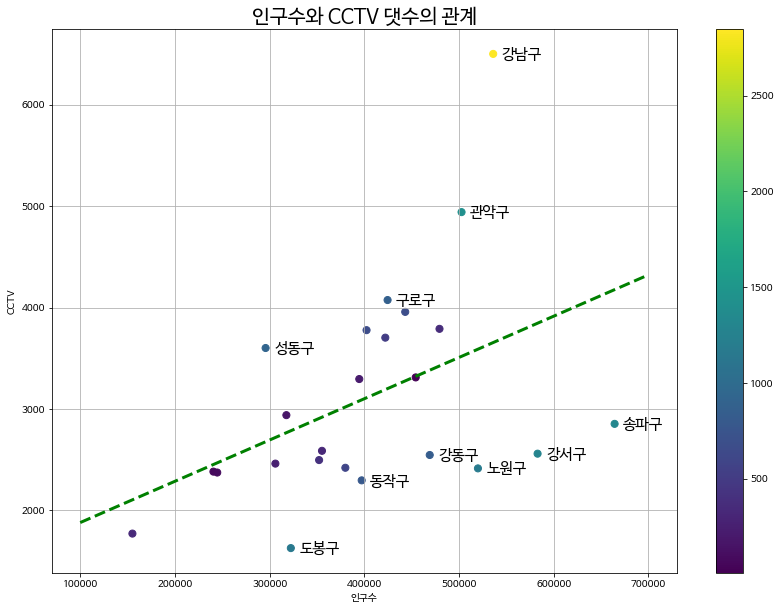

In [27]:

plt.figure(figsize=(14,10))
plt.scatter(df.인구수, df.CCTV댓수, c=df.오차, s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

for i in range(10): 
    plt.text(df_sort.인구수[i]+9000, df_sort.CCTV댓수[i]-50,
             df_sort.index[i], fontsize=15)

plt.grid(True)
plt.title('인구수와 CCTV 댓수의 관계', fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.show()